In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# get the data
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
# get the close price
series = df['close'].values.reshape(-1, 1)

In [3]:
series.shape

(1259, 1)

In [4]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

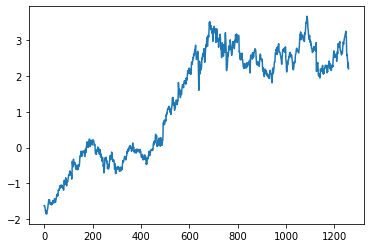

In [5]:
# plot it
plt.plot(series)
plt.show()

In [6]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)

In [7]:
print(len(X))
print(X[0])
print(len(X[0]))
print(len(series) - T)

1249
[-1.62500489 -1.64174953 -1.6330132  -1.66431839 -1.68470317 -1.77279453
 -1.76478623 -1.84778139 -1.84486928 -1.78517101]
10
1249


In [8]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10) Y.shape (1249,)


In [9]:
print(X.shape)
print(X[0])
print(Y.shape)
print(Y[0])
print(N)

(1249, 10)
[-1.62500489 -1.64174953 -1.6330132  -1.66431839 -1.68470317 -1.77279453
 -1.76478623 -1.84778139 -1.84486928 -1.78517101]
(1249,)
-1.8550616725763345
1249


In [10]:
Xtrain, Ytrain = X[:-N // 2], Y[:-N // 2]
Xtest, Ytest = X[-N // 2:], Y[-N // 2:]
print(len(Xtrain), len(Xtest))
print(len(Ytrain), len(Ytest))

Xtrain, Xtest = train_test_split(X, test_size=0.5)
Ytrain, Ytest = train_test_split(Y, test_size=0.5) 
print(len(Xtrain), len(Xtest))
print(len(Ytrain), len(Ytest))

624 625
624 625
624 625
624 625


In [11]:
# build and train the model
model = LinearRegression()
model.fit(Xtrain, Ytrain)

# Make predictions
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [12]:
print(model)
print(model.get_params)
print(model.n_jobs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
None


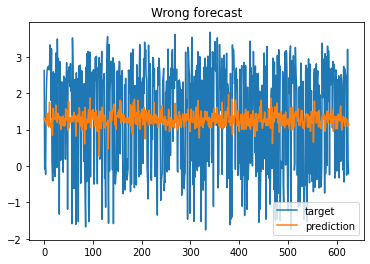

In [13]:
# wrong forecast
plt.plot(Ytest, label='target')
plt.plot(Ptest, label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

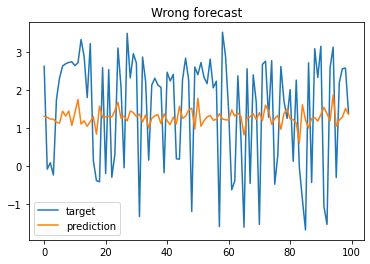

In [14]:
# wrong forecast zoom in
plt.plot(Ytest[:100], label='target')
plt.plot(Ptest[:100], label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

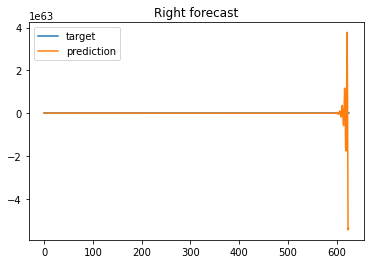

In [15]:
# right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
    f = model.predict(input_.reshape(1, T))[0]
    forecast.append(f)

    # make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()

In [16]:
# inverse transform
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [17]:
# Print the MAE
# Train is better than naive but test is worse
print("linear train mae:", mae(Ytrain2, Ptrain2))
print("linear test mae:", mae(Ytest2, Ptest2))

linear train mae: 9.5065485742249
linear test mae: 9.46141298026047


========================================================================

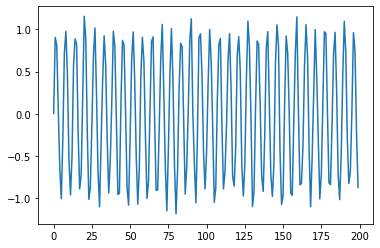

X.shape (190, 10) Y.shape (190,)
Epoch 1/80


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 66ms/step - loss: 0.3405 - val_loss: 0.1664
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.2422 - val_loss: 0.2065
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1408 - val_loss: 0.0554
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0767 - val_loss: 0.1421
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1195 - val_loss: 0.0660
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0486 - val_loss: 0.0597
Epoch 7/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0763 - val_loss: 0.0857
Epoch 8/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0638 - val_loss: 0.0420
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0415 - val_loss: 0.0627
Epoch 10/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0575 - val_loss: 0.0534
Epoch 11/80
3/3 [=======================

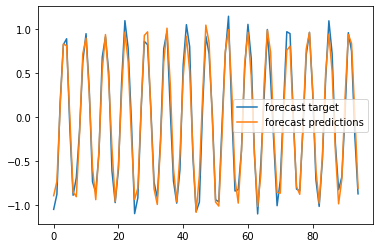

In [18]:
# -*- coding: utf-8 -*-
"""Autoregressive-AR.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1sAX8EHOYwEYOj7XNfKKpsyVJJN6-btZJ
"""

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import *
# %matplotlib inline

series = np.sin(01. * np.arange(200)) + np.random.randn(200) * 0.1
plt.plot(series)
plt.show()

T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

M = -N // 2
i = layers.Input(shape=(T,))
x = layers.Dense(1)(i)
model = models.Model(i, x)
model.compile(loss=losses.mse, optimizer=optimizers.Adam(lr=0.1))
r = model.fit(X[:M], Y[:M], epochs=80, validation_data=(X[M:], Y[M:]))

validation_target = Y[M:]
validation_predictions = []
i = -N // 2
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0]
    i += 1
    validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()

========================================================================

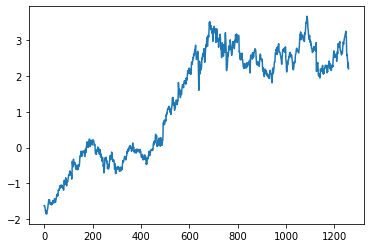

X.shape (1249, 10, 1) Y.shape (1249,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
20/20 [==============================] - 18s 46ms/step - loss: 0.3213 - val_loss: 0.4254
Epoch 2/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0851 - val_loss: 0.5442
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0328 - val_loss: 0.2061
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0183 - val_loss: 0.1301
Epoch 5/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0112 - val_loss: 0.0819
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0097 - val_loss: 0.0747
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0600
Epoch 8/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0074 - val_loss: 0.0512
Epoch 9/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0090 - val_loss: 0.0571
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0082 - val_loss: 0.0506
Epoch 11/80
20/20

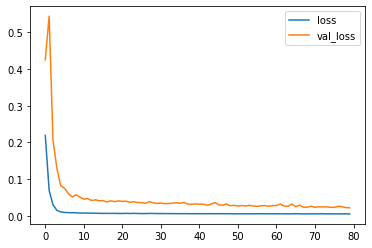

lstm train mae: 0.3563922594755125
lstm test mae: 0.7470520434570312


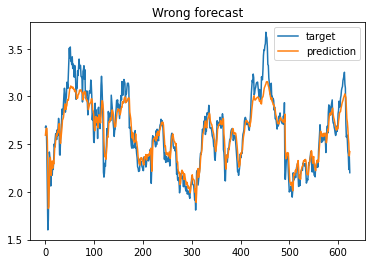

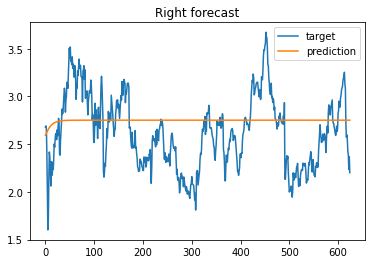

In [19]:
# -*- coding: utf-8 -*-
"""Predict the Stock Price using LSTMs.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1anOQKz-2LOnyPr-bBVMWhtmBwiy0sge4
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

from keras.models import Model
from keras.layers import Input, LSTM, GRU, SimpleRNN, Dense
import keras.backend as K
from keras.optimizers import SGD, Adam

# get the data
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

df.head()

# get the close price
series = df['close'].values.reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

# plot it
plt.plot(series)
plt.show()

### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

# split into train and test
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

### try autoregressive RNN model
i = Input(shape=(T, 1))

# multiple LSTMs
# x = LSTM(5, return_sequences=True)(i)
# x = LSTM(5, return_sequences=True)(x)
# x = LSTM(5)(x)

# one LSTM
x = LSTM(5)(i)

x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  Xtrain, Ytrain,
  epochs=80,
  validation_data=(Xtest, Ytest),
)

# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Make predictions
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

# inverse transform
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

# Print the MAE
print("lstm train mae:", mae(Ytrain2, Ptrain2))
print("lstm test mae:", mae(Ytest2, Ptest2))

# wrong forecast
plt.plot(Ytest, label='target')
plt.plot(Ptest, label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

# right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()

========================================================================

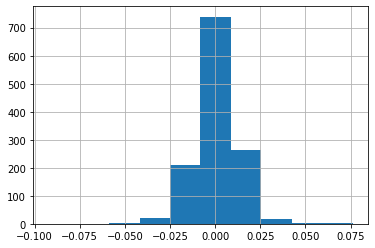

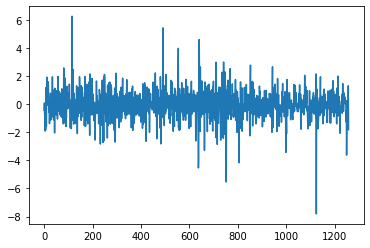

X.shape (1248, 10, 1) Y.shape (1248,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
20/20 [==============================] - 3s 35ms/step - loss: 0.9864 - val_loss: 1.1586
Epoch 2/80
20/20 [==============================] - 0s 9ms/step - loss: 0.8126 - val_loss: 1.1435
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9564 - val_loss: 1.1521
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9440 - val_loss: 1.1298
Epoch 5/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9279 - val_loss: 1.1433
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.8885 - val_loss: 1.1532
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 1.0375 - val_loss: 1.1738
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 1.0205 - val_loss: 1.1731
Epoch 9/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9486 - val_loss: 1.1438
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 1.0685 - val_loss: 1.1711
Epoch 11/80
20/20 

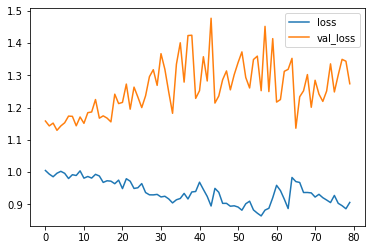

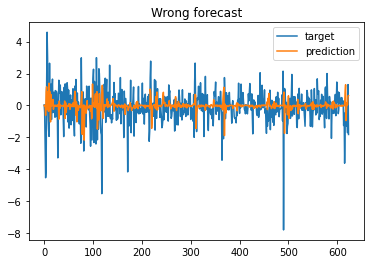

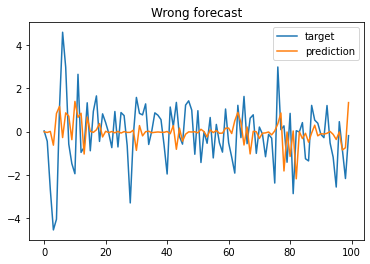

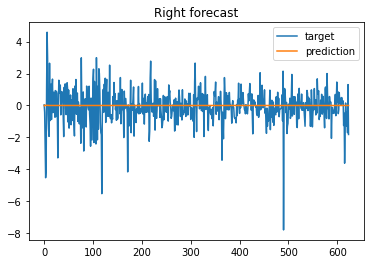

In [20]:
# -*- coding: utf-8 -*-
"""Predict the Stock Return.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1KLZzP24x-ueSVobGmX90H-39S9yjwL-z
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

from keras.models import Model
from keras.layers import Input, LSTM, GRU, SimpleRNN, Dense
import keras.backend as K
from keras.optimizers import SGD, Adam

# get the data
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

df.head()

# calculate returns by first shifting the data
df['PrevClose'] = df['close'].shift(1) # move everything up 1

# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

df.head()

# then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

df.head()

# See what the distribution is
df['Return'].hist()
plt.show()

# Get the returns as a Numpy array
series = df['Return'].values[1:].reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

# plot it
plt.plot(series)
plt.show()

### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

# split into train and test
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  Xtrain, Ytrain,
  epochs=80,
  validation_data=(Xtest, Ytest),
)

# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Make Predictions
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

# wrong forecast
plt.plot(Ytest, label='target')
plt.plot(Ptest, label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

# Zoom in:
plt.plot(Ytest[:100], label='target')
plt.plot(Ptest[:100], label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

# right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()

# Note: there's no point in calculating the MAE here because the
# scale is not comparable to the price

========================================================================

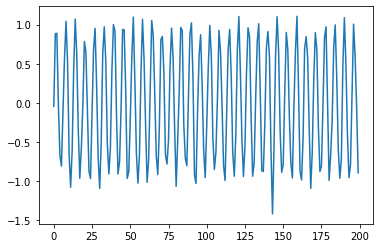

X.shape (190, 10) Y.shape (190,)
Epoch 1/80


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 53ms/step - loss: 0.1611 - val_loss: 0.1710
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1556 - val_loss: 0.0525
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0377 - val_loss: 0.0784
Epoch 4/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0891 - val_loss: 0.0504
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0344 - val_loss: 0.0311
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0489 - val_loss: 0.0484
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0423 - val_loss: 0.0251
Epoch 8/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0291 - val_loss: 0.0360
Epoch 9/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0365 - val_loss: 0.0181
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0250 - val_loss: 0.0263
Epoch 11/80
3/3 [=======================

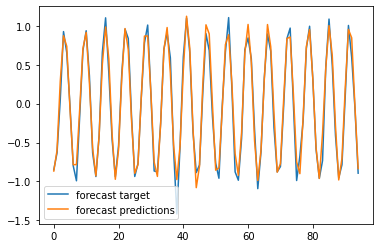

In [21]:
# -*- coding: utf-8 -*-
"""Autoregressive-AR.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1sAX8EHOYwEYOj7XNfKKpsyVJJN6-btZJ
"""

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import *
# %matplotlib inline

series = np.sin(01. * np.arange(200)) + np.random.randn(200) * 0.1
plt.plot(series)
plt.show()

T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

M = -N // 2
i = layers.Input(shape=(T,))
x = layers.Dense(1)(i)
model = models.Model(i, x)
model.compile(loss=losses.mse, optimizer=optimizers.Adam(lr=0.1))
r = model.fit(X[:M], Y[:M], epochs=80, validation_data=(X[M:], Y[M:]))

validation_target = Y[M:]
validation_predictions = []
i = -N // 2
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0]
    i += 1
    validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()